In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm

/Users/serene/miniconda3/envs/gneiss_v2/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## read in data

In [8]:
table = pd.read_csv('../data/genus.txt', sep='\t', index_col=0) 

In [9]:
table.head()

,Bifidobacterium,Bacteroides,Prevotellaceae_Prevotella,Paraprevotellaceae_Prevotella,Lactobacillus,Pseudoramibacter_Eubacterium,Anaerostipes,Coprococcus,Lachnospira,Roseburia,Lachnospiraceae_Ruminococcus,Faecalibacterium,Ruminococcaceae_Ruminococcus,Phascolarctobacterium,Eubacterium,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism
BI0023,0.000000,0.273254,0.000138,0.0,0.0,0.0,0.005060,0.015733,0.034962,0.000000,0.006302,0.024657,0.032064,0.007958,0.000092,25.8,0.0393,1.77,0.001523,0.068605
BI0056,0.000000,0.750930,0.018904,0.0,0.0,0.0,0.000000,0.001609,0.001659,0.001408,0.011212,0.006033,0.020111,0.002313,0.000000,39.2,0.0619,3.91,0.001579,0.099745
BI0131,0.000000,0.249063,0.000096,0.0,0.0,0.0,0.000385,0.002932,0.021580,0.000000,0.002643,0.044891,0.007594,0.009324,0.000000,23.1,0.0521,1.49,0.002255,0.064502
BI0153,0.001917,0.485493,0.000132,0.0,0.0,0.0,0.000925,0.001124,0.061728,0.008988,0.002313,0.155112,0.007138,0.004891,0.000132,27.3,0.0431,2.14,0.001579,0.078388
BI0215,0.000113,0.383766,0.000000,0.0,0.0,0.0,0.000000,0.002547,0.009339,0.016415,0.001585,0.060452,0.053320,0.006962,0.000000,33.0,0.0502,3.62,0.001521,0.109697


In [10]:
# log transformation
dat = np.log(table + 0.000001)

In [11]:
dat.head()

,Bifidobacterium,Bacteroides,Prevotellaceae_Prevotella,Paraprevotellaceae_Prevotella,Lactobacillus,Pseudoramibacter_Eubacterium,Anaerostipes,Coprococcus,Lachnospira,Roseburia,Lachnospiraceae_Ruminococcus,Faecalibacterium,Ruminococcaceae_Ruminococcus,Phascolarctobacterium,Eubacterium,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism
BI0023,-13.815511,-1.297349,-8.880985,-13.815511,-13.815511,-13.815511,-5.286139,-4.151943,-3.353470,-13.815511,-5.066678,-3.702642,-3.440001,-4.833400,-9.282860,3.250375,-3.236505,0.570980,-6.486249,-2.679380
BI0056,-13.815511,-0.286441,-3.968330,-13.815511,-13.815511,-13.815511,-13.815511,-6.431615,-6.400862,-6.565058,-4.490711,-5.110315,-3.906458,-6.068899,-13.815511,3.668677,-2.782219,1.363538,-6.450279,-2.305129
BI0131,-13.815511,-1.390046,-9.239500,-13.815511,-13.815511,-13.815511,-7.860958,-5.831782,-3.835927,-13.815511,-5.935285,-3.103498,-4.880270,-4.675031,-13.815511,3.139833,-2.954571,0.398777,-6.093980,-2.741041
BI0153,-6.256683,-0.722588,-8.923817,-13.815511,-13.815511,-13.815511,-6.984363,-6.790398,-2.785008,-4.711735,-6.068721,-1.863601,-4.942230,-5.320231,-8.923817,3.306887,-3.144209,0.760806,-6.450486,-2.546068
BI0215,-9.077512,-0.957719,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-5.972399,-4.673401,-4.109512,-6.446618,-2.805894,-2.931430,-4.967126,-13.815511,3.496508,-2.991720,1.286474,-6.487591,-2.210024


In [14]:
var = table.columns[0:15]
print(var)

Index(['Bifidobacterium', 'Bacteroides', 'Prevotellaceae_Prevotella',
       'Paraprevotellaceae_Prevotella', 'Lactobacillus',
       'Pseudoramibacter_Eubacterium', 'Anaerostipes', 'Coprococcus',
       'Lachnospira', 'Roseburia', 'Lachnospiraceae_Ruminococcus',
       'Faecalibacterium', 'Ruminococcaceae_Ruminococcus',
       'Phascolarctobacterium', 'Eubacterium'],
      dtype='object')


In [15]:
vars_vd = np.array(['OHVD3', 'OHV1D3', 'OHV24D3', 'ratio_activation', 'ratio_catabolism'])

In [16]:
# check assumptions
df = dat.copy()
out = []
k = 0
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_OHVD3 = out.loc[out.pvalue <= 0.05]
out_OHVD3

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
2,OHVD3,Prevotellaceae_Prevotella,-0.009184,0.010562,0.009958,1.973118e-10,22.346633,0.675352
3,OHVD3,Paraprevotellaceae_Prevotella,-0.014461,0.032996,0.006389,2.354255e-10,80.465951,0.882118
12,OHVD3,Ruminococcaceae_Ruminococcus,0.025526,0.024112,0.007359,9.543376e-11,13.452309,0.500103


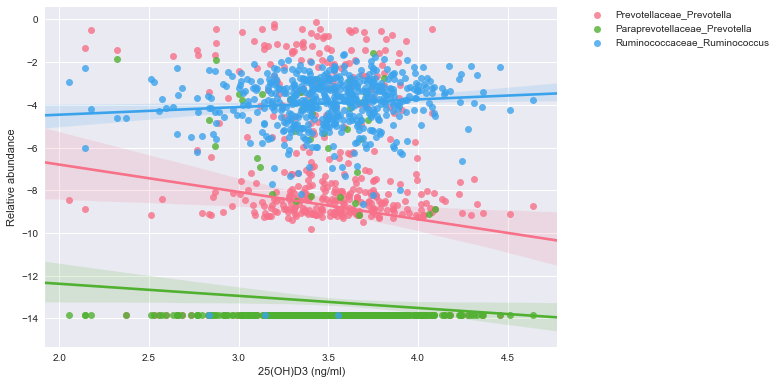

In [22]:
k = 0
bact = out_OHVD3.X.values

sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=dat)
    ax.set(xlabel='25(OH)D3 (ng/ml)', ylabel='Relative abundance')
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()

In [23]:
## OHV1D3

out = []
k = 1
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_OHV1D3 = out.loc[out.pvalue <= 0.05]
out_OHV1D3

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
0,OHV1D3,Bifidobacterium,0.014933,0.000169,0.023018,1.623312e-08,28.702583,0.365788
7,OHV1D3,Coprococcus,0.031667,0.000763,0.018134,5.235779e-08,24.082221,0.336091
8,OHV1D3,Lachnospira,0.022725,0.000158,0.023238,4.811110e-09,15.422711,0.980579
11,OHV1D3,Faecalibacterium,0.020827,0.000206,0.022373,3.838541e-07,8.637686,0.023725
12,OHV1D3,Ruminococcaceae_Ruminococcus,0.040222,0.000161,0.023187,9.907960e-09,13.492414,0.553417


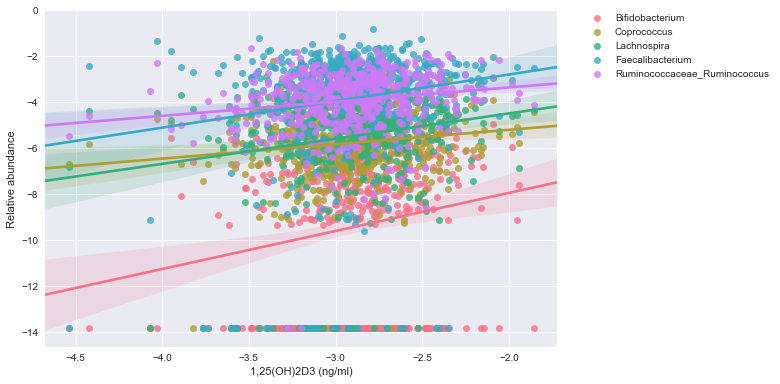

In [25]:
k = 1
bact = out_OHV1D3.X.values

sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=dat)
    ax.set(xlabel='1,25(OH)2D3 (ng/ml)', ylabel='Relative abundance')
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()

In [26]:
# OHV24D3

out = []
k = 2
for i in range(len(var)):
    tmp = df[[var[i], vars_vd[k]]].dropna(axis=0, how='any')
    y = tmp[vars_vd[k]]
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
#     name = ['t value', 'p value']
#     test = sms.linear_harvey_collier(results)
#     linear = lzip(name, test)[1][1]

    out.append([vars_vd[k], var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val'])
out_OHV24D3 = out.loc[out.pvalue <= 0.05]
out_OHV24D3

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val
7,OHV24D3,Coprococcus,0.036918,0.015911,0.008492,1.945209e-12,24.082221,0.622284
12,OHV24D3,Ruminococcaceae_Ruminococcus,0.068726,0.000071,0.025870,8.042402e-14,13.492414,0.294172


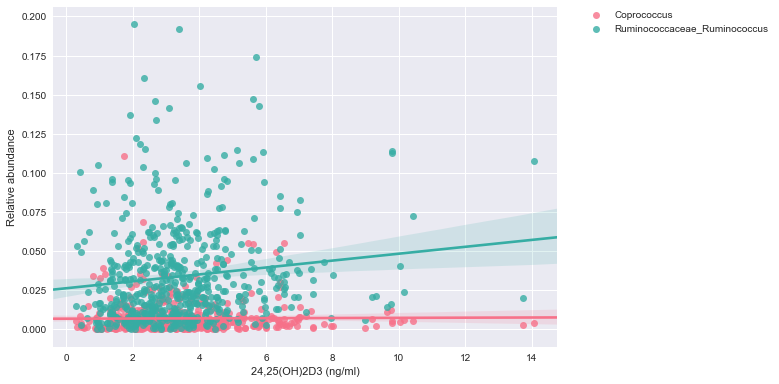

In [27]:
k = 2
bact = out_OHV24D3.X.values

sns.set(color_codes=True)
sns.set_palette("husl", n_colors=len(bact))

for i in range(len(bact)):
    ax = sns.regplot(x=vars_vd[k], y=bact[i], 
                     label=bact[i], data=table)
    ax.set(xlabel='24,25(OH)2D3 (ng/ml)', ylabel='Relative abundance')
ax.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = ax.get_figure()
ax.tight_layout()